In [10]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon


In [82]:




# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"), ("b", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [500] * 500  # You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    "b": {"a": lambda a: a * 0.7},
    "c": {"a": lambda a: a * 2, "b": lambda b: np.mean(np.array(list(b))) * 3},
    "d": {"b": lambda b: b * 1.5, "c": lambda c: c * 0.4},
    "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1, "b": lambda b: np.mean((np.array(list(b))))}
}


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fcfd5623c10>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
  File "_pydevd_bundle/pydevd_cython.pyx", line 1457, in _pydevd_bundle.pydevd_cython.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython.pyx", line 1758, in _pydevd_bundle.pydevd_cython.ThreadTracer.__call__
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_is_thread_alive.py", line 9, in is_thread_alive
    def is_thread_alive(t):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [15]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [16]:

# Sample data from the model
sampled_data = hscm.sample_data()


a


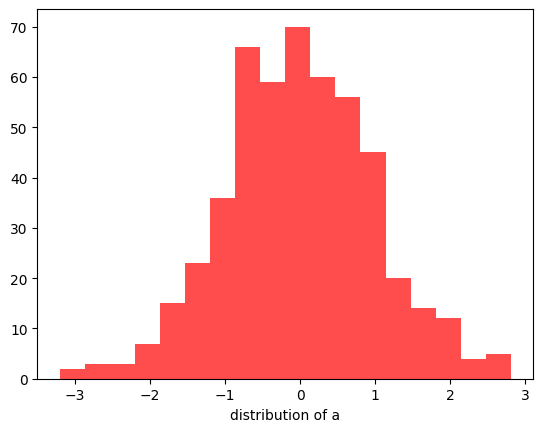

c


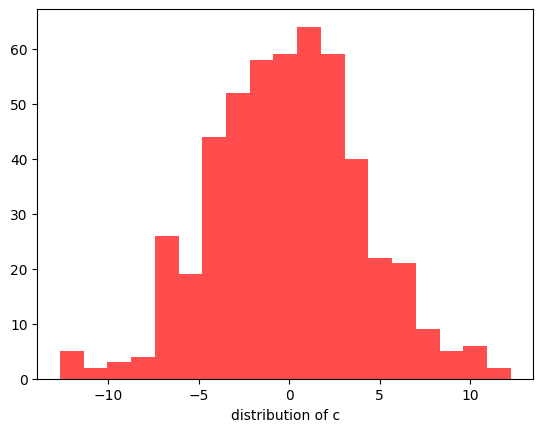

e


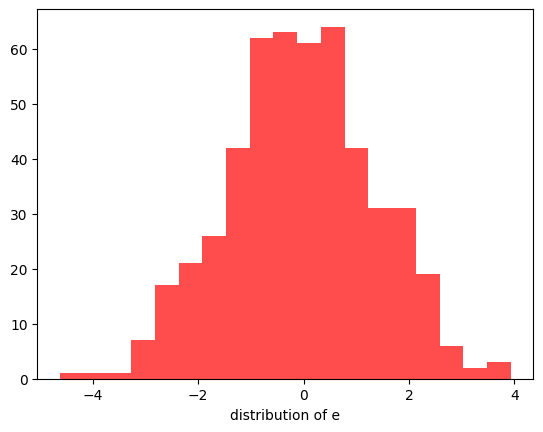

[[1.5410391281928728,
  0.5026330516824435,
  0.3650516187092578,
  1.652526954345678,
  -0.7729974776348855,
  0.4462924504909088,
  -0.04083783919527737,
  -0.13129067748196235,
  -1.0075709024044257,
  0.027038114522002603,
  0.4845219522889338,
  1.018242481850733,
  0.37283538175462466,
  0.4457737391643705,
  -1.3302181507144841,
  -0.4268705223461284,
  -2.6588450108775143,
  1.5428915830591112,
  0.927635027198559,
  -0.6173940193585592,
  0.8176836616972528,
  -0.5755111222552097,
  1.10509166745432,
  0.27021109428958384,
  0.8893820983694689,
  0.7758414846315427,
  -0.9596899282814805,
  -1.4890140632315716,
  0.00570672422655176,
  1.5559346243135284,
  -0.1672345558517996,
  -1.1463086418803266,
  0.8490727811269259,
  -0.6723190042590808,
  -0.9760562092971774,
  0.9440581061576884,
  -1.225496825690625,
  -0.5128566258707722,
  1.6353294304061903,
  0.3935749563733045,
  0.6537039557564577,
  -2.2115825416529167,
  -0.3436087135949484,
  0.1165380695223509,
  0.75152843

In [17]:

# Plot the sampled data
hscm.plot_data()


In [19]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()



In [20]:

# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.sample_data()


a


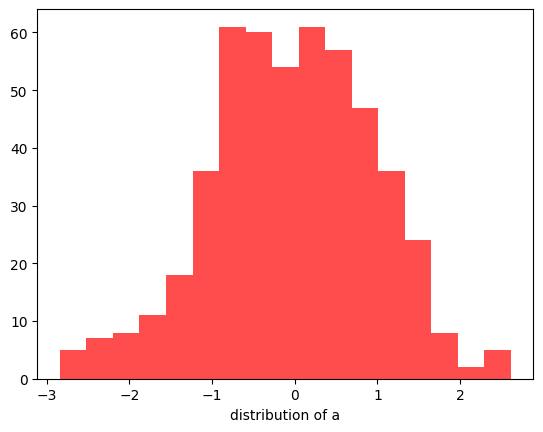

c


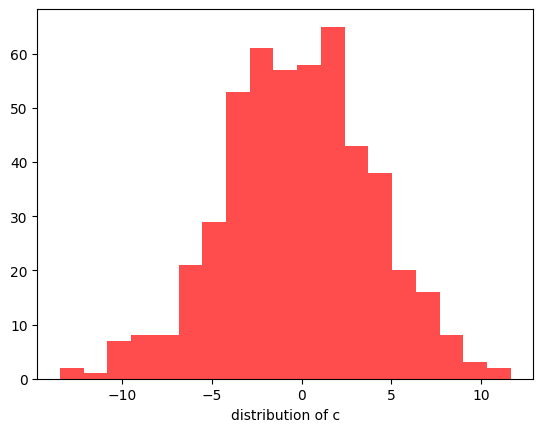

e


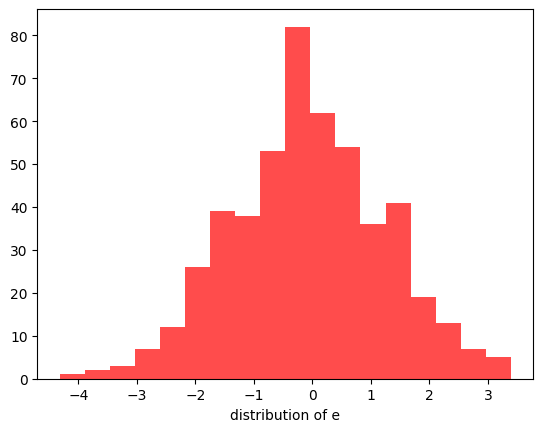

'\nfor node in nodes:\n    plt.figure(figsize=(10, 5))\n    plt.subplot(1, 2, 1)\n    plt.hist([sampled_data[node + str(i)] for i in range(len(sizes))], bins=\'auto\', alpha=0.7, color=\'b\')\n    plt.title(f"Original {node}")\n    plt.subplot(1, 2, 2)\n    plt.hist([new_sampled_data[node + str(i)] for i in range(len(sizes))], bins=\'auto\', alpha=0.7, color=\'r\')\n    plt.title(f"Modified {node}")\n    plt.show()\n'

In [21]:

# Plot the new sampled data
hscm.plot_data()

# Compare the original and new sampled data
'''
for node in nodes:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist([sampled_data[node + str(i)] for i in range(len(sizes))], bins='auto', alpha=0.7, color='b')
    plt.title(f"Original {node}")
    plt.subplot(1, 2, 2)
    plt.hist([new_sampled_data[node + str(i)] for i in range(len(sizes))], bins='auto', alpha=0.7, color='r')
    plt.title(f"Modified {node}")
    plt.show()
'''

In [22]:

# Perform any additional analysis or visualization as needed
# Store sampled data in a txt file
from experiments.utils.utils import store_dict_to_file, load_dict_from_file # type: ignore

# Define the filename
filename = 'linear_gaussian_500_500_1sampled_data.txt'

# Store the sampled data
store_dict_to_file(sampled_data, filename)

print(f"Sampled data has been stored in {filename}")

Sampled data has been stored in linear_gaussian_500_500_1sampled_data.txt


In [23]:

# Perform any additional analysis or visualization as needed
# Store sampled data in a txt file
from experiments.utils.utils import store_dict_to_file, load_dict_from_file # type: ignore

# Define the filename
filename = 'linear_gaussian_500_500_1sampled_data.txt'

# Store the sampled data
store_dict_to_file(new_sampled_data, filename)

print(f"Sampled data has been stored in {filename}")

Sampled data has been stored in linear_gaussian_500_500_1sampled_data.txt


Loading

In [27]:
# Load the sampled data from the text file
filename = 'linear_gaussian_500_500_1sampled_data.txt'
sampled_data = load_dict_from_file(filename)

# Load the original data from the text file
newsampled_filename = 'linear_gaussian_500_500_2sampled_data.txt'
original_data = load_dict_from_file(newsampled_filename)


In [28]:

# Print the first few items of both original and sampled data for comparison
print("First few items of original data:")
for i, (key, value) in enumerate(original_data.items()):
    print(f"{key}: {value}")
    if i == 4:  # Print only the first 5 items
        break

print("\nFirst few items of sampled data:")
for i, (key, value) in enumerate(sampled_data.items()):
    print(f"{key}: {value}")
    if i == 4:  # Print only the first 5 items
        break

# Store the loaded data in variables for further analysis
original_data_dict = original_data
sampled_data_dict = sampled_data


First few items of original data:
a0: -0.5510757696566388
a1: 1.2665047505150664
a2: -0.9206723650025236
a3: 0.4873869814748876
a4: 1.3599108022278772

First few items of sampled data:
a0: 1.5410391281928728
a1: 0.5026330516824435
a2: 0.3650516187092578
a3: 1.652526954345678
a4: -0.7729974776348855


kl_divergence

In [30]:
import numpy as np
from scipy.stats import entropy

def calculate_kl_divergence(p, q):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# Calculate KL divergence for unit nodes (a, c, e)
unit_nodes = ['a', 'c', 'e']
unit_kl_divergences = {}

for node in unit_nodes:
    original = [original_data_dict[f"{node}{i}"] for i in range(len(sizes))]
    sampled = [sampled_data_dict[f"{node}{i}"] for i in range(len(sizes))]
    
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_sampled, _ = np.histogram(sampled, bins=50, density=True)
    
    # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_sampled += 1e-10
    
    # Normalize
    hist_original /= hist_original.sum()
    hist_sampled /= hist_sampled.sum()
    
    kl_div = calculate_kl_divergence(hist_original, hist_sampled)
    unit_kl_divergences[node] = kl_div

print("KL divergences for unit nodes (a, c, e):")
for node, kl_div in unit_kl_divergences.items():
    print(f"{node}: {kl_div}")


KL divergences for unit nodes (a, c, e):
a: 0.2306660864330031
c: 0.2359702356682613
e: 0.41768416044547846


Subunit nodes for kl div

In [31]:

# Calculate KL divergence for subunit nodes (b, d)
subunit_nodes = ['b', 'd']
subunit_kl_divergences = {node: {} for node in subunit_nodes}

for node in subunit_nodes:
    for i in range(len(sizes)):
        kl_divs = []
        for j in range(sizes[i]):
            original = original_data_dict[f"_{node}{i}_{j}"]
            sampled = sampled_data_dict[f"_{node}{i}_{j}"]
            
            # Calculate histograms
            hist_original, _ = np.histogram([original], bins=50, density=True)
            hist_sampled, _ = np.histogram([sampled], bins=50, density=True)
            
            # Add small constant to avoid division by zero
            hist_original += 1e-10
            hist_sampled += 1e-10
            
            # Normalize
            hist_original /= hist_original.sum()
            hist_sampled /= hist_sampled.sum()
            
            kl_div = calculate_kl_divergence(hist_original, hist_sampled)
            kl_divs.append(kl_div)
        
        subunit_kl_divergences[node][i] = np.mean(kl_divs)

print("\nKL divergences for subunit nodes (b, d):")
for node in subunit_nodes:
    print(f"{node}:")
    for i, kl_div in subunit_kl_divergences[node].items():
        print(f"  Unit {i}: {kl_div}")



KL divergences for subunit nodes (b, d):
b:
  Unit 0: 3.178669124055864
  Unit 1: 2.9631661325944494
  Unit 2: 4.5255628206897045
  Unit 3: 3.070917628325157
  Unit 4: 3.017041880459803
  Unit 5: 5.2798232908046545
  Unit 6: 6.842219978899911
  Unit 7: 5.333699038670009
  Unit 8: 3.394172115517278
  Unit 9: 4.417811324958997
  Unit 10: 5.710829273727485
  Unit 11: 1.6162724359606089
  Unit 12: 3.7174266027094003
  Unit 13: 4.417811324958998
  Unit 14: 5.333699038670009
  Unit 15: 2.9092903847290965
  Unit 16: 3.7174266027094
  Unit 17: 3.771302350574754
  Unit 18: 3.286420619786571
  Unit 19: 2.747663141133035
  Unit 20: 3.070917628325157
  Unit 21: 4.094556837766876
  Unit 22: 3.6635508548440465
  Unit 23: 4.256184081362937
  Unit 24: 3.178669124055864
  Unit 25: 3.2325448719212173
  Unit 26: 5.603077777996777
  Unit 27: 4.633314316420412
  Unit 28: 5.387574786535362
  Unit 29: 1.885651175287377
  Unit 30: 4.579438568555059
  Unit 31: 3.932929594170815
  Unit 32: 2.0472784188834376
 

In [39]:
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
from scipy.stats import norm, expon
import matplotlib.pyplot as plt

def run_experiment(k):
    print(k)
    # Define the HSCM model structure
    nodes = ["a", "b", "c", "d", "e"]
    edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"), ("b", "e")]
    unit_nodes = ["a", "c", "e"]
    subunit_nodes = ["d", "b"]
    sizes = [500] * 500  # You can adjust this based on your data

    # Initialize the HSCM model
    hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

    # Define random functions for each node
    random_functions = {
        "a": lambda x: norm.ppf(x, 0, 1),
        "b": lambda x: norm.ppf(x, 0, 1),
        "c": lambda x: norm.ppf(x, 0, 1),
        "d": lambda x: norm.ppf(x, 0, 1),
        "e": lambda x: norm.ppf(x, 0, 1)
    }

    # Define additive functions for each node
    additive_functions = {
        "a": {},
        "b": {"a": lambda a: a * 0.7},
        "c": {"a": lambda a: a * 2, "b": lambda b: np.mean(np.array(list(b))) * 3},
        "d": {"b": lambda b: b * 1.5, "c": lambda c: c * 0.4},
        "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1, "b": lambda b: np.mean((np.array(list(b))))}
    }

    # Set up the HSCM model
    hscm.additive_model(additive_functions, random_functions)

    # Sample data from the model
    sampled_data = hscm.sample_data()
    print('sampled data !')

    # Set distributions from the sampled data
    hscm.set_distribution_from_data()

    # Resample data
    resampled_data = hscm.sample_data()
    print('sampled data 2 !!!!!')

    kl_divergences = {}
    for node in unit_nodes:
        original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
        resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
        
        # Calculate histograms
        hist_original, _ = np.histogram(original, bins=50, density=True)
        hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
        hist_original += 1e-10
        hist_resampled += 1e-10
        
        # Normalize
        hist_original /= hist_original.sum()
        hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
        kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
        kl_divergences[node] = kl_divs
    print('kl_divergences', kl_divergences)
    return kl_divergences


In [ ]:

# Run the experiment 100 times
results = [run_experiment(k) for k in range(50)]


0
sampled data !


In [38]:
print(results)

[{'a': 5.379792680641985, 'c': 5.496903715637907, 'e': 9.281633513771586}, {'a': 10.949557011010755, 'c': 8.188258639138194, 'e': 6.341900282332442}, {'a': 8.016635085420349, 'c': 7.595835321278359, 'e': 7.145054099391176}, {'a': 4.652151767892345, 'c': 7.085172573276512, 'e': 9.71238513622328}, {'a': 9.168174543484621, 'c': 6.859867887485633, 'e': 7.473065173048768}, {'a': 6.47218210462665, 'c': 7.993705581440416, 'e': 5.051588403669687}, {'a': 6.799562184369044, 'c': 9.0343535602521, 'e': 9.13951031699519}, {'a': 2.9963909151722703, 'c': 3.4063213618435646, 'e': 5.964130283635472}, {'a': 7.288014847828565, 'c': 7.7510640329393965, 'e': 13.528517267149617}, {'a': 7.598066728872981, 'c': 8.287791194291836, 'e': 6.724126860170147}, {'a': 6.941414341566103, 'c': 8.799219008383925, 'e': 7.454233501534037}, {'a': 8.238198850528613, 'c': 4.84633990206797, 'e': 7.6812055235836425}, {'a': 9.832317927700458, 'c': 5.748214936904302, 'e': 7.985607504591572}, {'a': 8.81013126798122, 'c': 8.059603

In [ ]:

# Analyze the results
kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Plot the distribution of KL divergences for each node
plt.figure(figsize=(12, 8))
for node, divergences in kl_divergences.items():
    plt.hist(divergences, bins=20, alpha=0.5, label=node)
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.title('Distribution of KL Divergences over 100 Experiments')
plt.legend()
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

In [76]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)

original_vectors = create_vector(sampled_data, sizes)
new_vectors = create_vector(new_sampled_data, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


In [77]:
print(X[:5], y[:5], X.shape, y.shape, original_vectors.shape, new_vectors.shape)
print(original_vectors[:5], new_vectors[:5])

[[ 1.18697206  3.96752983]
 [-0.21540385  3.82452014]
 [ 2.00833662  6.01829025]
 [ 2.0402843   4.35555679]
 [ 1.52501225  5.90004704]] [0 0 0 0 0] (500000, 2) (500000,) (250000, 2) (250000, 2)
[[ 1.18697206  3.96752983]
 [-0.21540385  3.82452014]
 [ 2.00833662  6.01829025]
 [ 2.0402843   4.35555679]
 [ 1.52501225  5.90004704]] [[-0.46795528 -2.15569311]
 [-1.59135537 -3.30220453]
 [ 0.65923757  1.05705152]
 [-0.15857164 -1.02739344]
 [-0.3771471  -2.01645406]]


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [79]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [80]:

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

1min38 of running

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     49996
           1       0.50      0.49      0.50     50004

    accuracy                           0.50    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.50      0.50      0.50    100000

Accuracy: 0.50


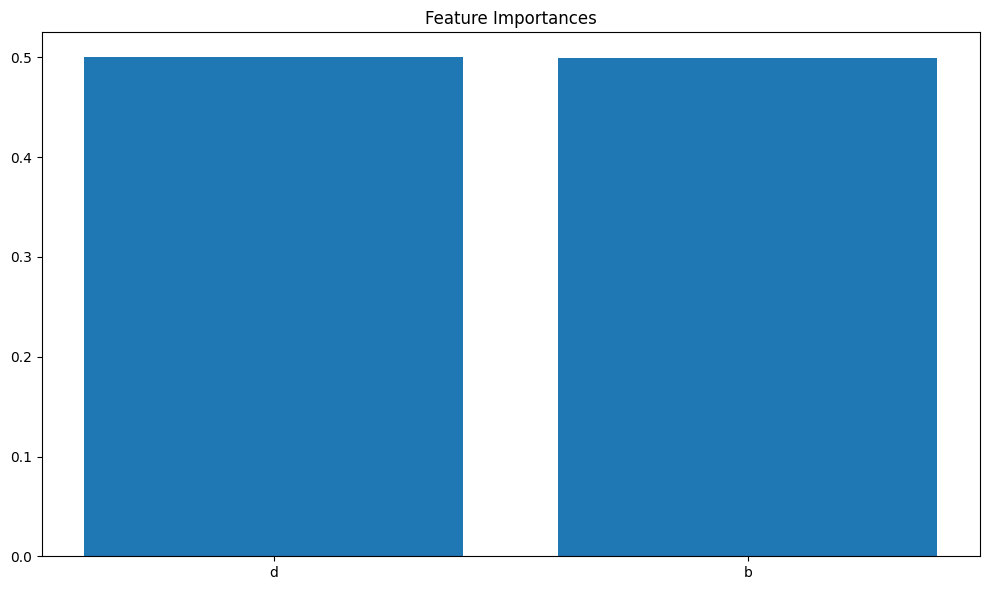

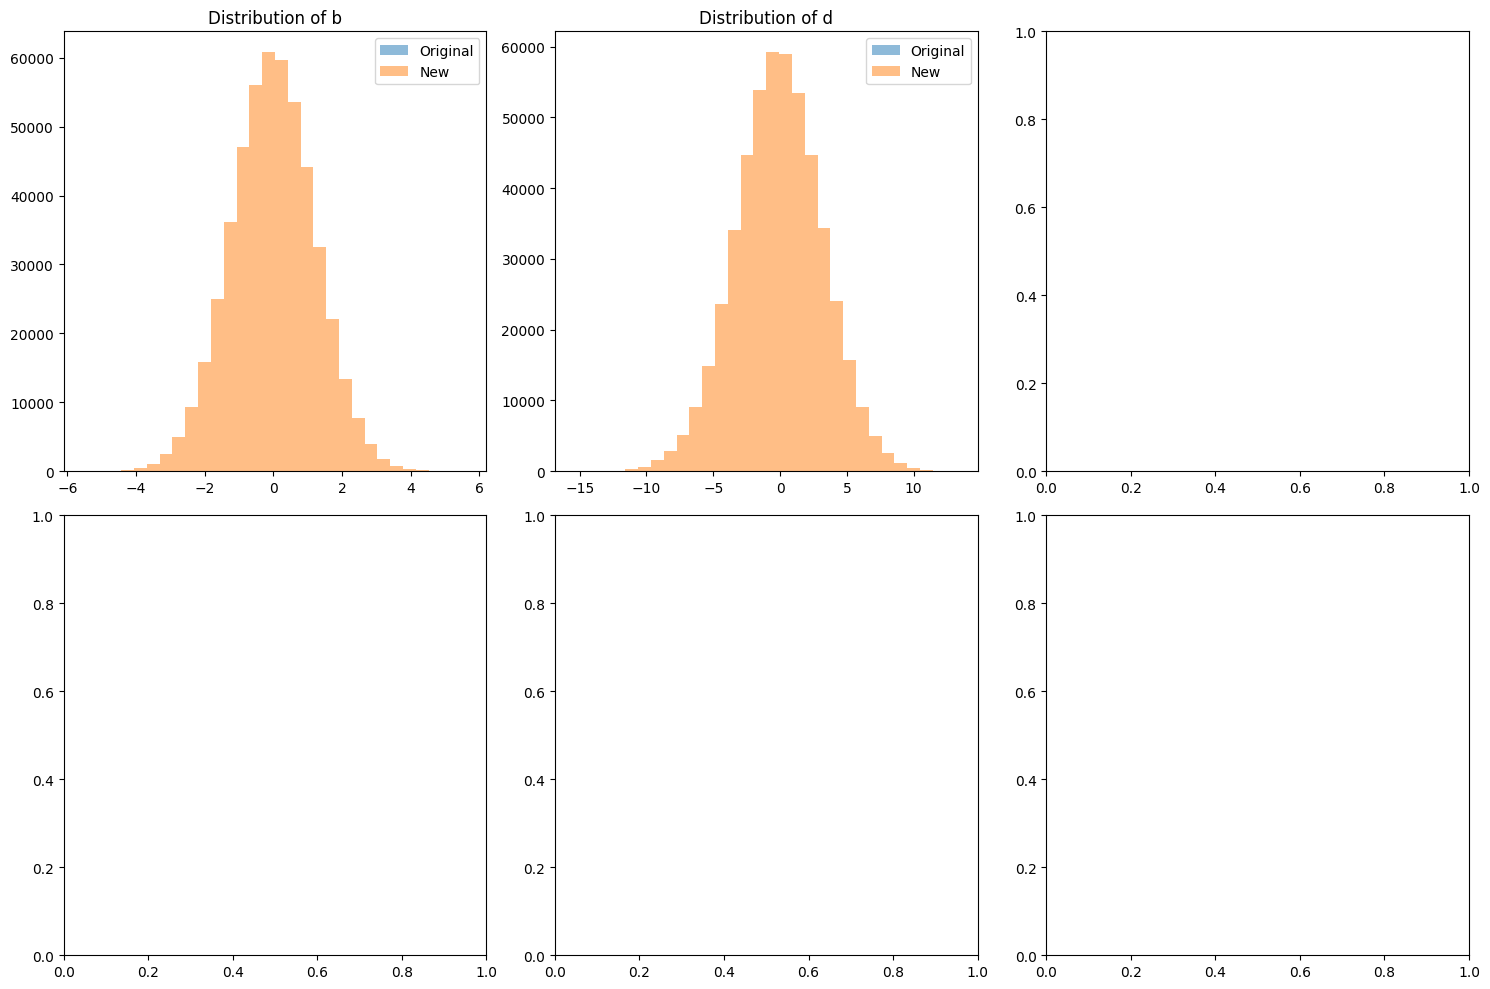

In [81]:

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot feature importances
feature_names = ['b', 'd']
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.tight_layout()
plt.show()

# Plot distributions of original and new sampling for each feature
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, feature in enumerate(feature_names):
    axs[i].hist(X[:len(sizes), i], bins=30, alpha=0.5, label='Original')
    axs[i].hist(X[len(sizes):, i], bins=30, alpha=0.5, label='New')
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].legend()

plt.tight_layout()
plt.show()